In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('heart.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Summary statistics of numerical features
print("\nSummary statistics of numerical features:")
print(df.describe())


First few rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Missing values in the dataset:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Summary statistics of numerical features:
               age          sex           cp     trestbps        c

In [6]:
# Create age categories
df['age_category'] = pd.cut(df['age'], bins=[0, 40, 60, 80, 120], labels=['young', 'middle-aged', 'elderly', 'very elderly'])

# Create binary feature for high cholesterol
cholesterol_threshold = 240
df['high_chol'] = df['chol'] > cholesterol_threshold

# Calculate heart rate reserve
df['heart_rate_reserve'] = df['thalach'] - df['trestbps']


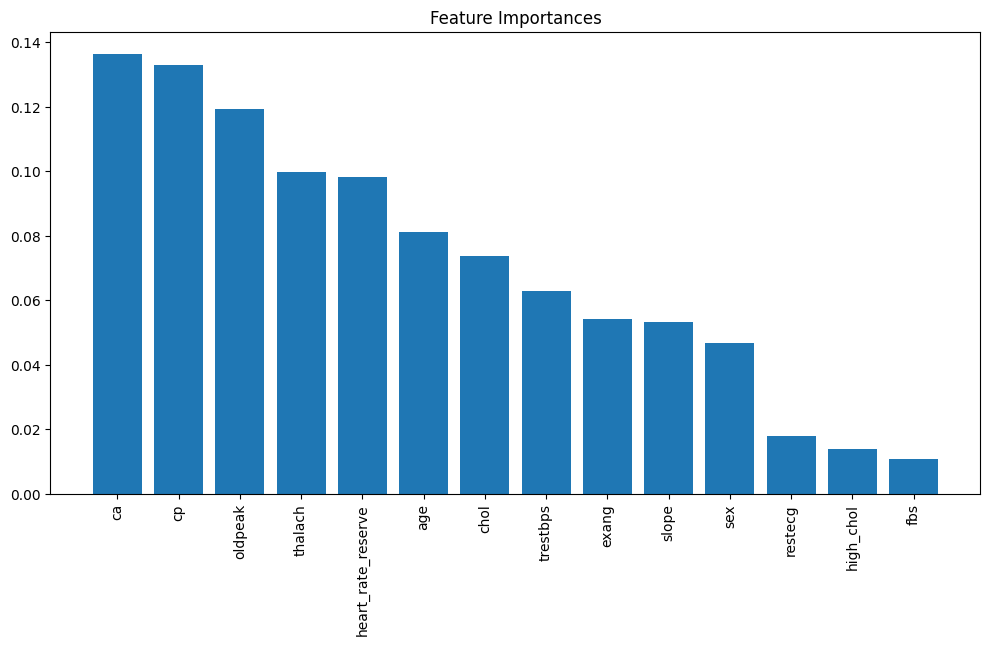

In [7]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Encode categorical features
df = pd.get_dummies(df, columns=['age_category', 'thal'], drop_first=True)

# Select features and target variable
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'high_chol', 'heart_rate_reserve']
target = 'target'

X = df[features]
y = df[target]

# Initialize and fit the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

print("Original number of features:", X.shape[1])
print("Reduced number of features after PCA:", X_pca.shape[1])


Original number of features: 14
Reduced number of features after PCA: 11


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9853658536585366
